In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 2
Deadline: Wednesday, 3 January 2024, 23:59 IST

Name: ANUSHKA GUPTA
Roll Number: 210174
IITK Email: anushkag21@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Find the best fit degree of polynomial for the given data (use the data 1 link)
2. Predict the model for the given data (use data link 2)
3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca

Use everything you have learned till date in part 3, its a competition!!!

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook

  share a link to the notebook for problem 3 in this colab notebook if you use
  a different notebook for part 3.

"""

Best fit degree of polynomial: 9


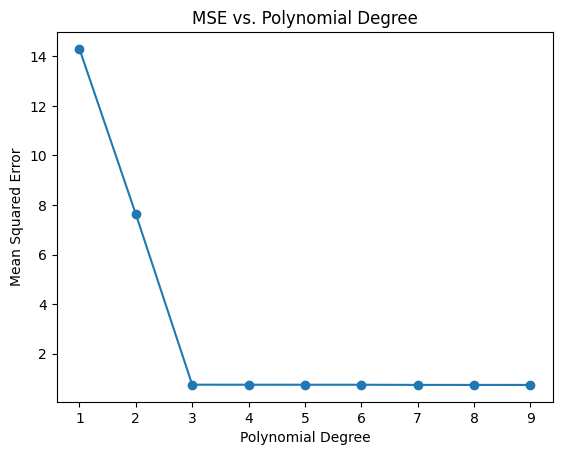

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('data_week2_1.csv')


X = data['x'].values.reshape(-1, 1)  # Features
y = data['y'].values  # Target

degrees = np.arange(1, 10)  # Try polynomials from degree 1 to 9
mse_values = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

best_degree = np.argmin(mse_values) + 1  # +1 because degrees start from 1
print(f"Best fit degree of polynomial: {best_degree}")

# Plotting the MSE vs. Polynomial Degree
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Polynomial Degree')
plt.show()

<ipython-input-2-c3e215043a92>:21: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-2-c3e215043a92>:27: RuntimeWarning: divide by zero encountered in divide
  return a / x + b


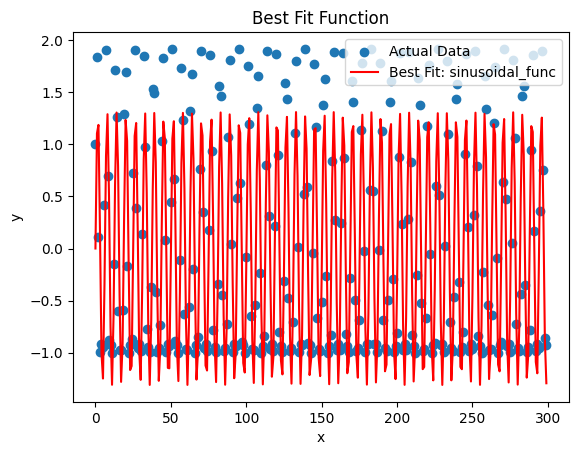

Best fit function: sinusoidal_func
Best fit parameters: [1.30845022 1.0039413 ]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your dataset (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('dataweek2.csv')

# Assuming 'x' and 'y' are the column names
x = data['x'].values
y = data['y'].values

# Define different types of functions to fit
def linear_func(x, a, b):
    return a * x + b

def exponential_func(x, a, b):
    return a * np.exp(b * x)

def logarithmic_func(x, a, b):
    return a * np.log(x) + b

def sinusoidal_func(x, a, b):
    return a * np.sin(b * x)

def reciprocal_func(x, a, b):
    return a / x + b

# Fit each function to the data
functions = [linear_func, exponential_func, logarithmic_func, sinusoidal_func, reciprocal_func]

best_fit = None
best_params = None
best_function = None
best_residuals = float('inf')

for func in functions:
    try:
        params, _ = curve_fit(func, x, y)
        y_pred = func(x, *params)
        residuals = np.sum((y - y_pred) ** 2)
        if residuals < best_residuals:
            best_fit = y_pred
            best_params = params
            best_function = func
            best_residuals = residuals
    except Exception as e:
        print(f"Fit failed for {func.__name__}: {e}")

# Plotting the best-fit function
plt.scatter(x, y, label='Actual Data')
plt.plot(x, best_fit, color='red', label=f'Best Fit: {best_function.__name__}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Function')
plt.legend()
plt.show()

print(f"Best fit function: {best_function.__name__}")
print(f"Best fit parameters: {best_params}")


In [ ]:
"https://colab.research.google.com/drive/19HO1ppU6e3Pm8FbSlNzE1ceglHWMAN1v?usp=sharing"
"LINK for Kaggle competition"